In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
from sklearn.svm  import SVR
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve, GridSearchCV,learning_curve

pd.options.display.max_columns = 150

# chargement et affichage des données

df_data = pd.read_csv("preparation_data.csv")


In [96]:
df_data



,price(thousand dollard),m2_living,grade,m2_above,bathrooms,view,m2_basement,bedrooms,zipcode_98004,waterfront,floors,zipcode_98039,zipcode_98040,zipcode_98112,zipcode_98006,zipcode_98033,zipcode_98168,zipcode_98001,zipcode_98042,zipcode_98023
0,221.900,109.62554,7,109.62554,1.00,0,0.00000,3,0,0,1.0,0,0,0,0,0,0,0,0,0
1,538.000,238.76071,7,201.59951,2.25,0,37.16120,3,0,0,2.0,0,0,0,0,0,0,0,0,0
2,180.000,71.53531,6,71.53531,1.00,0,0.00000,2,0,0,1.0,0,0,0,0,0,0,0,0,0
3,604.000,182.08988,7,97.54815,3.00,0,84.54173,4,0,0,1.0,0,0,0,0,0,0,0,0,0
4,510.000,156.07704,8,156.07704,2.00,0,0.00000,3,0,0,1.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21586,360.000,142.14159,8,142.14159,2.50,0,0.00000,3,0,0,3.0,0,0,0,0,0,0,0,0,0
21587,400.000,214.60593,8,214.60593,2.50,0,0.00000,4,0,0,2.0,0,0,0,0,0,0,0,0,0
21588,402.101,94.76106,7,94.76106,0.75,0,0.00000,2,0,0,2.0,0,0,0,0,0,0,0,0,0
21589,400.000,148.64480,8,148.64480,2.50,0,0.00000,3,0,0,2.0,0,0,0,0,0,0,0,0,0


In [97]:
#1er etape definir les colonne de X et y pour pour marchine learning 

X=df_data[['m2_living', 'grade', 'm2_above',
       'bathrooms', 'view', 'm2_basement', 'bedrooms', 'zipcode_98004',
       'waterfront', 'floors', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98112', 'zipcode_98006', 'zipcode_98033', 'zipcode_98168',
       'zipcode_98001', 'zipcode_98042', 'zipcode_98023']]
y =df_data['price(thousand dollard)']



In [98]:
#2er etape  sepatation des data en X_train,X_test,y_train,y_test  avec train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [99]:
#3 etape sepatation de X_train pour X_train et X_validation cross-balidation
cross_val_score(Lasso(),X_train,y_train,cv=5).mean()



/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.050e+07, tolerance: 1.739e+05
  model = cd_fast.enet_coordinate_descent(
/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.314e+07, tolerance: 1.827e+05
  model = cd_fast.enet_coordinate_descent(
/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

0.6976730109962576

In [100]:
cross_val_score(Ridge(),X_train,y_train,cv=5).mean()

0.7070031057722158

In [101]:
cross_val_score(ElasticNet(),X_train,y_train,cv=5).mean()

/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.616e+08, tolerance: 1.739e+05
  model = cd_fast.enet_coordinate_descent(
/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.732e+08, tolerance: 1.827e+05
  model = cd_fast.enet_coordinate_descent(
/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

0.5665550276449733

In [102]:
cross_val_score(LinearRegression(),X_train,y_train,cv=5).mean()

0.7069724763442684

In [103]:
model=Lasso()
param_grid={'alpha':np.arange(1,50)/10
            }

grid=GridSearchCV(Lasso(),param_grid,cv=5)
grid.fit(X_train,y_train)

/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.193e+07, tolerance: 1.739e+05
  model = cd_fast.enet_coordinate_descent(
/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.303e+07, tolerance: 1.827e+05
  model = cd_fast.enet_coordinate_descent(
/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [104]:
grid.best_score_

0.7069155168027225

In [105]:
grid.best_params_

{'alpha': 0.1}

In [106]:
model=Ridge()
param_grid={'alpha':np.arange(1,50)/10
            }

grid=GridSearchCV(model,param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [107]:
grid.best_score_

0.7070069709272357

In [108]:
grid.best_params_

{'alpha': 0.6}

In [109]:
"""
model=ElasticNet()
param_grid={'alpha':np.arange(1,50)/10,
            'l1_ratio':np.arange(1,50)/10
            }

grid=GridSearchCV(model,param_grid,cv=5)
grid.fit(X_train,y_train)
"""
#grid.best_score_ 0.7084832239460557 grid.best_params_{'alpha': 0.1, 'l1_ratio': 1.0}

"\nmodel=ElasticNet()\nparam_grid={'alpha':np.arange(1,50)/10,\n            'l1_ratio':np.arange(1,50)/10\n            }\n\ngrid=GridSearchCV(model,param_grid,cv=5)\ngrid.fit(X_train,y_train)\n"

In [110]:
grid.best_score_

0.7070069709272357

In [111]:
grid.best_params_

{'alpha': 0.6}

In [112]:
#besoin en echantillon
N,train_score,val_score =learning_curve(Ridge(),X_train,y_train,train_sizes= np.linspace(0.2,1.0,5) ,cv=5)
print(N)

[ 2763  5526  8290 11053 13817]


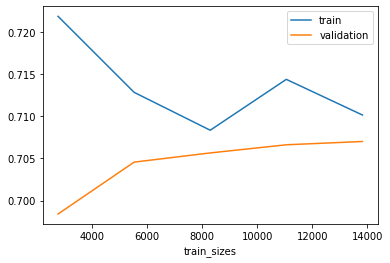

In [113]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel("train_sizes")
plt.legend()

8290 echantillons est necessaire pour avoir une estimation 

In [114]:
N,train_score,val_score =learning_curve(Lasso(alpha=0.1),X_train,y_train,train_sizes= np.linspace(0.2,1.0,5) ,cv=5)
print(N)

/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+07, tolerance: 2.913e+04
  model = cd_fast.enet_coordinate_descent(
/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.341e+07, tolerance: 6.586e+04
  model = cd_fast.enet_coordinate_descent(
/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

[ 2763  5526  8290 11053 13817]


/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.044e+07, tolerance: 1.757e+05
  model = cd_fast.enet_coordinate_descent(


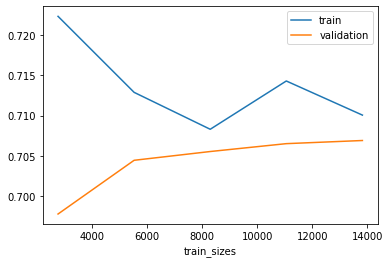

In [115]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel("train_sizes")
plt.legend()

In [116]:
N,train_score,val_score =learning_curve(ElasticNet(alpha= 0.1, l1_ratio= 1.0),X_train,y_train,train_sizes= np.linspace(0.2,1.0,5) ,cv=5)
print(N)

/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+07, tolerance: 2.913e+04
  model = cd_fast.enet_coordinate_descent(
/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.341e+07, tolerance: 6.586e+04
  model = cd_fast.enet_coordinate_descent(
/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

[ 2763  5526  8290 11053 13817]


/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.044e+07, tolerance: 1.757e+05
  model = cd_fast.enet_coordinate_descent(


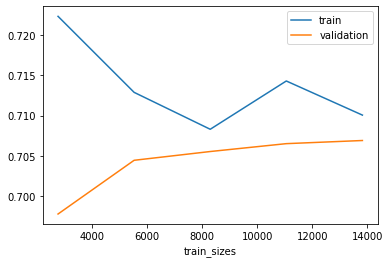

In [117]:
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel("train_sizes")
plt.legend()

In [118]:
model=Lasso(alpha=0.1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.750e+07, tolerance: 2.216e+05
  model = cd_fast.enet_coordinate_descent(


0.7136893178661731

In [119]:

model=Ridge(alpha=0.4)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.713704751897443

In [120]:

model=ElasticNet(alpha= 0.1, l1_ratio= 1.0)
model.fit(X_train,y_train)
model.score(X_test,y_test)

/home/zhang/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.750e+07, tolerance: 2.216e+05
  model = cd_fast.enet_coordinate_descent(


0.7136893178661731

In [121]:

model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7136512036850178